1. IMPORTAR LIBRERÍAS BÁSICAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [3]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

2. CARGA DE DATOS

In [4]:
df = pd.read_csv("C:/Users/Valentina Molina/Documents/Repositorios/Proyecto_Final_MLOps/data/PS_20174392719_1491204439457_log.csv")

In [5]:
# Vista rápida
print("Shape del dataset:", df.shape)
print("\nPrimeras filas:")
display(df.head())

Shape del dataset: (6362620, 11)

Primeras filas:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


3. INFORMACIÓN GENERAL

In [6]:
print("\nInfo del dataset:")
df.info()


Info del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
print("\nTipos de datos:")
print(df.dtypes)


Tipos de datos:
step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [8]:
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [9]:
print("\nValores únicos por columna:")
print(df.nunique())


Valores únicos por columna:
step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64


4. ESTADÍSTICAS DESCRIPTIVAS

In [10]:
print("\nResumen estadístico de variables numéricas:")
display(df.describe().T)


Resumen estadístico de variables numéricas:


,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [11]:
print("\nResumen de variables categóricas:")
display(df.describe(include=["object", "category"]).T)


Resumen de variables categóricas:


,count,unique,top,freq
type,6362620,5,CASH_OUT,2237500
nameOrig,6362620,6353307,C1677795071,3
nameDest,6362620,2722362,C1286084959,113


5. ANÁLISIS UNIVARIADO

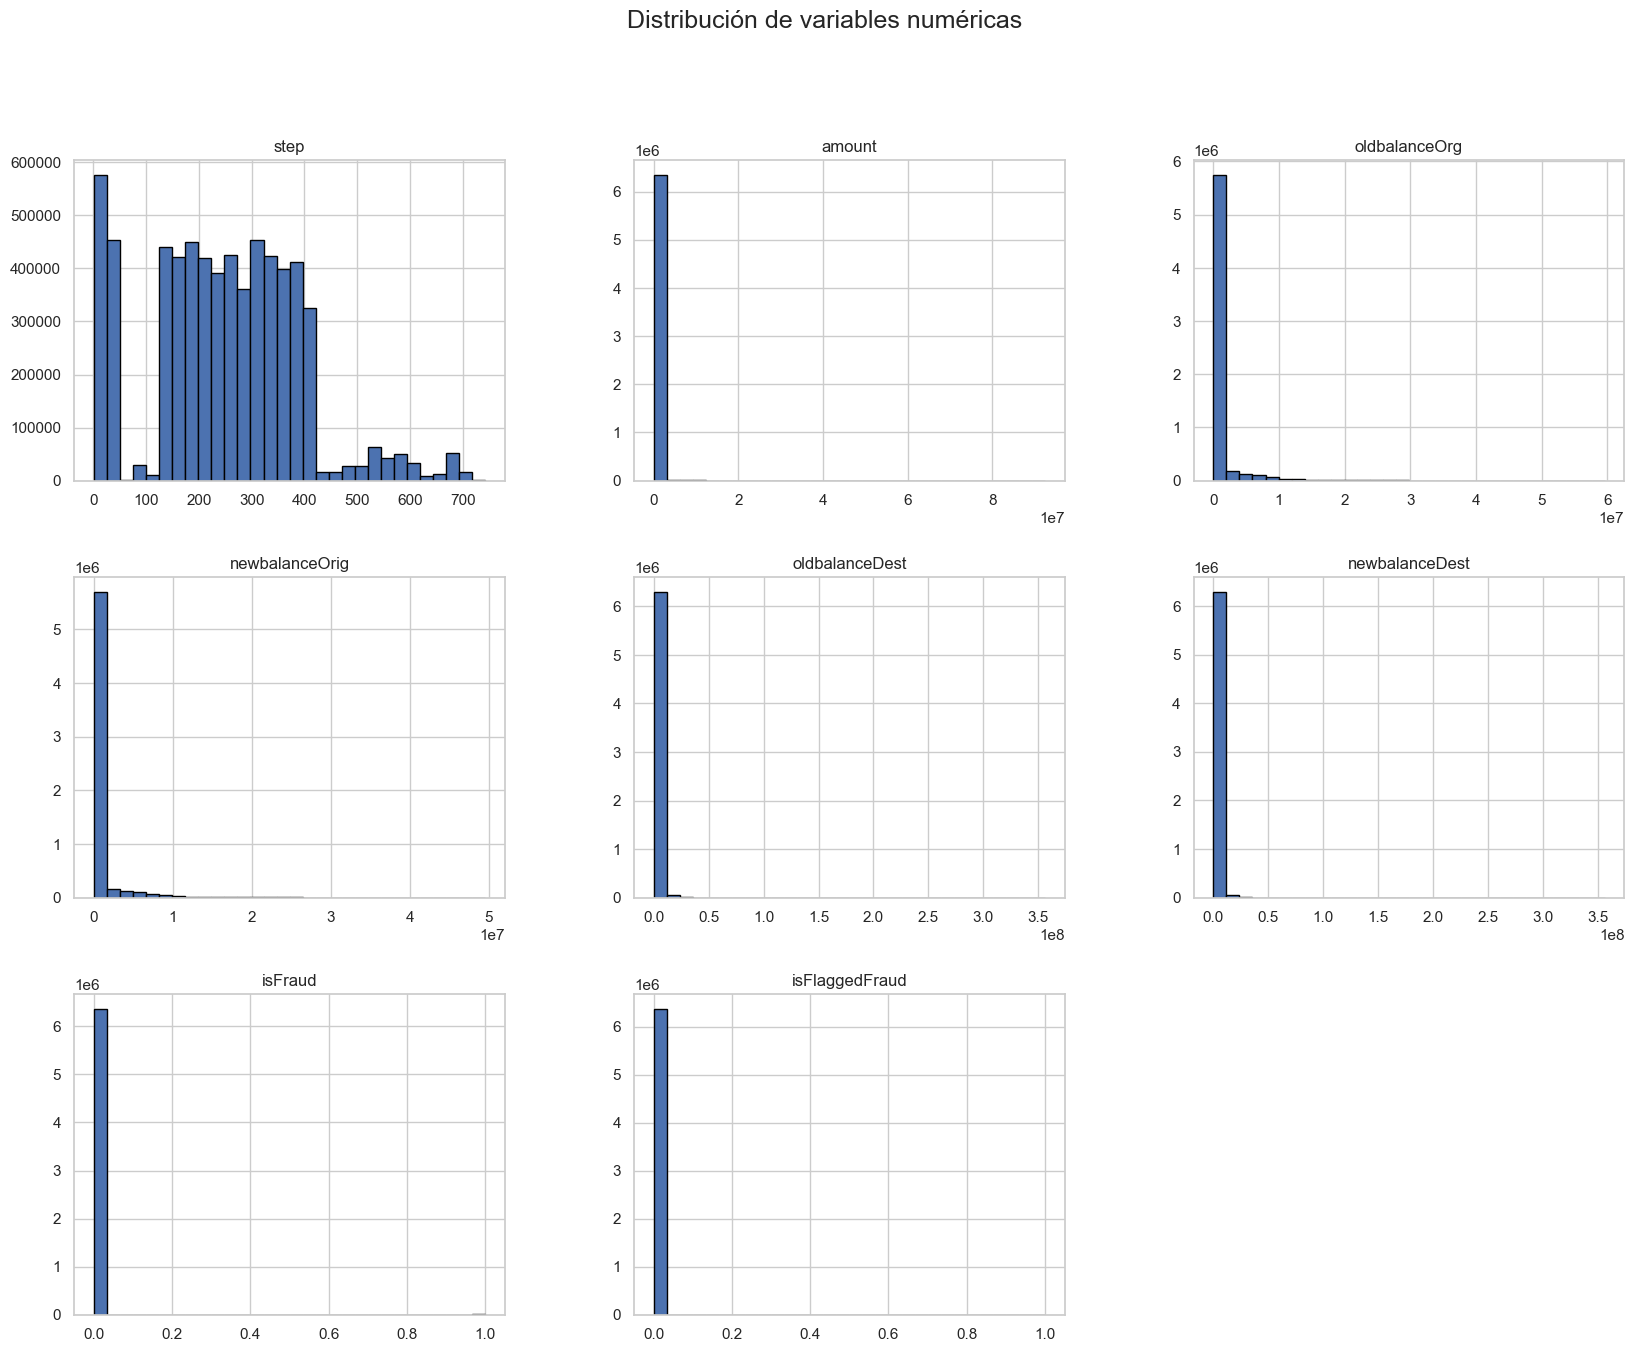

In [12]:
# Histogramas de todas las variables numéricas
df.hist(bins=30, figsize=(20,15), edgecolor="black")
plt.suptitle("Distribución de variables numéricas", fontsize=18)
plt.show()

C:\Users\Valentina Molina\AppData\Local\Temp\ipykernel_17272\1989102173.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=top_values, palette="Set2")


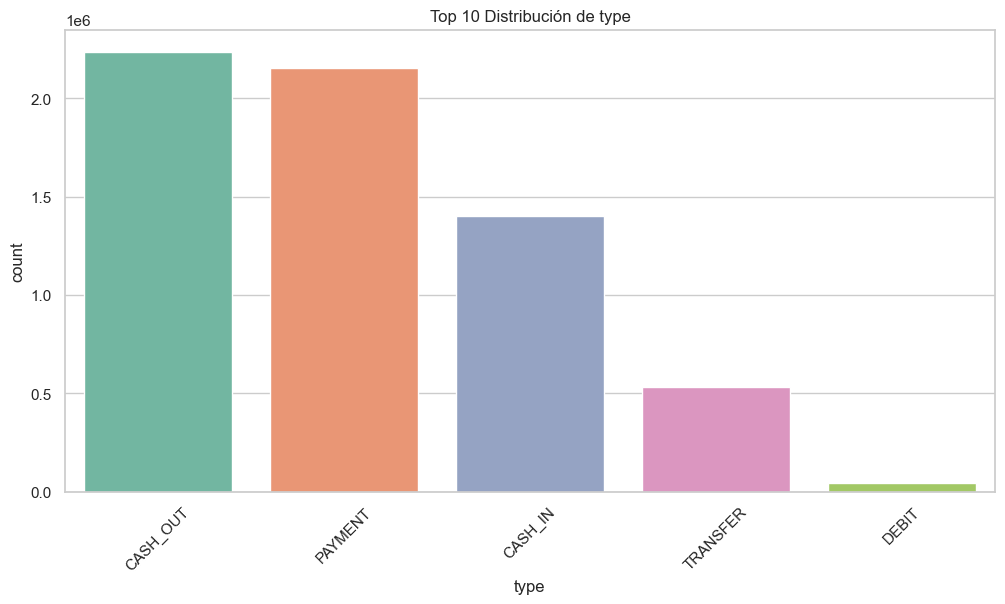

In [13]:
# Variables categóricas relevantes (excluyendo nameOrig y nameDest)
cat_cols = [col for col in df.select_dtypes(include=["object","category"]).columns 
            if col not in ["nameOrig","nameDest"]]

top_n = 10
for col in cat_cols:
    top_values = df[col].value_counts().nlargest(top_n).index
    sns.countplot(data=df, x=col, order=top_values, palette="Set2")
    plt.title(f"Top {top_n} Distribución de {col}")
    plt.xticks(rotation=45)
    plt.show()

6. ANÁLISIS BIVARIADO

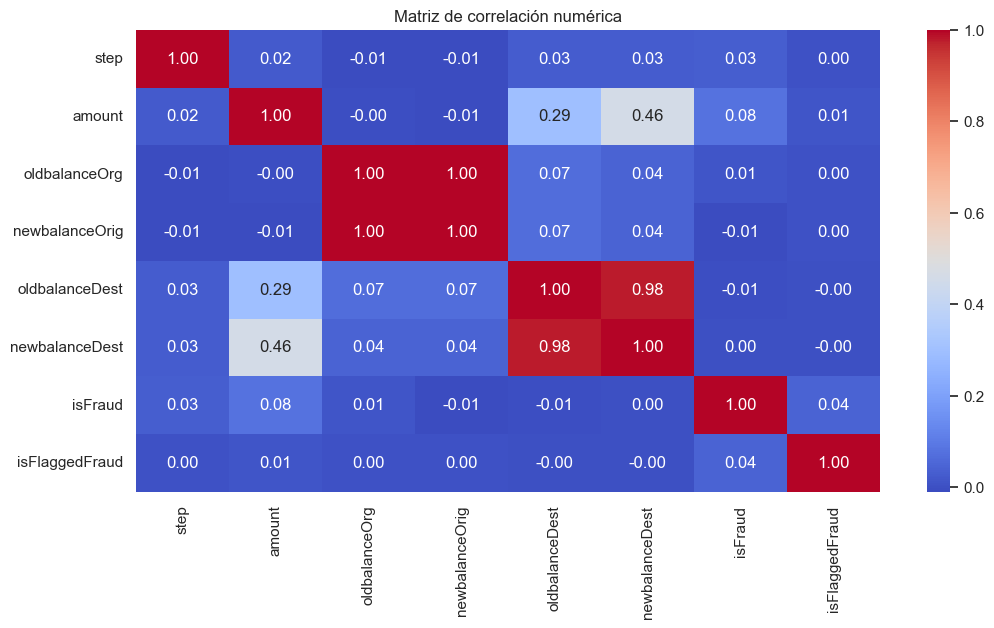

In [14]:
# Correlación entre variables numéricas
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación numérica")
plt.show()

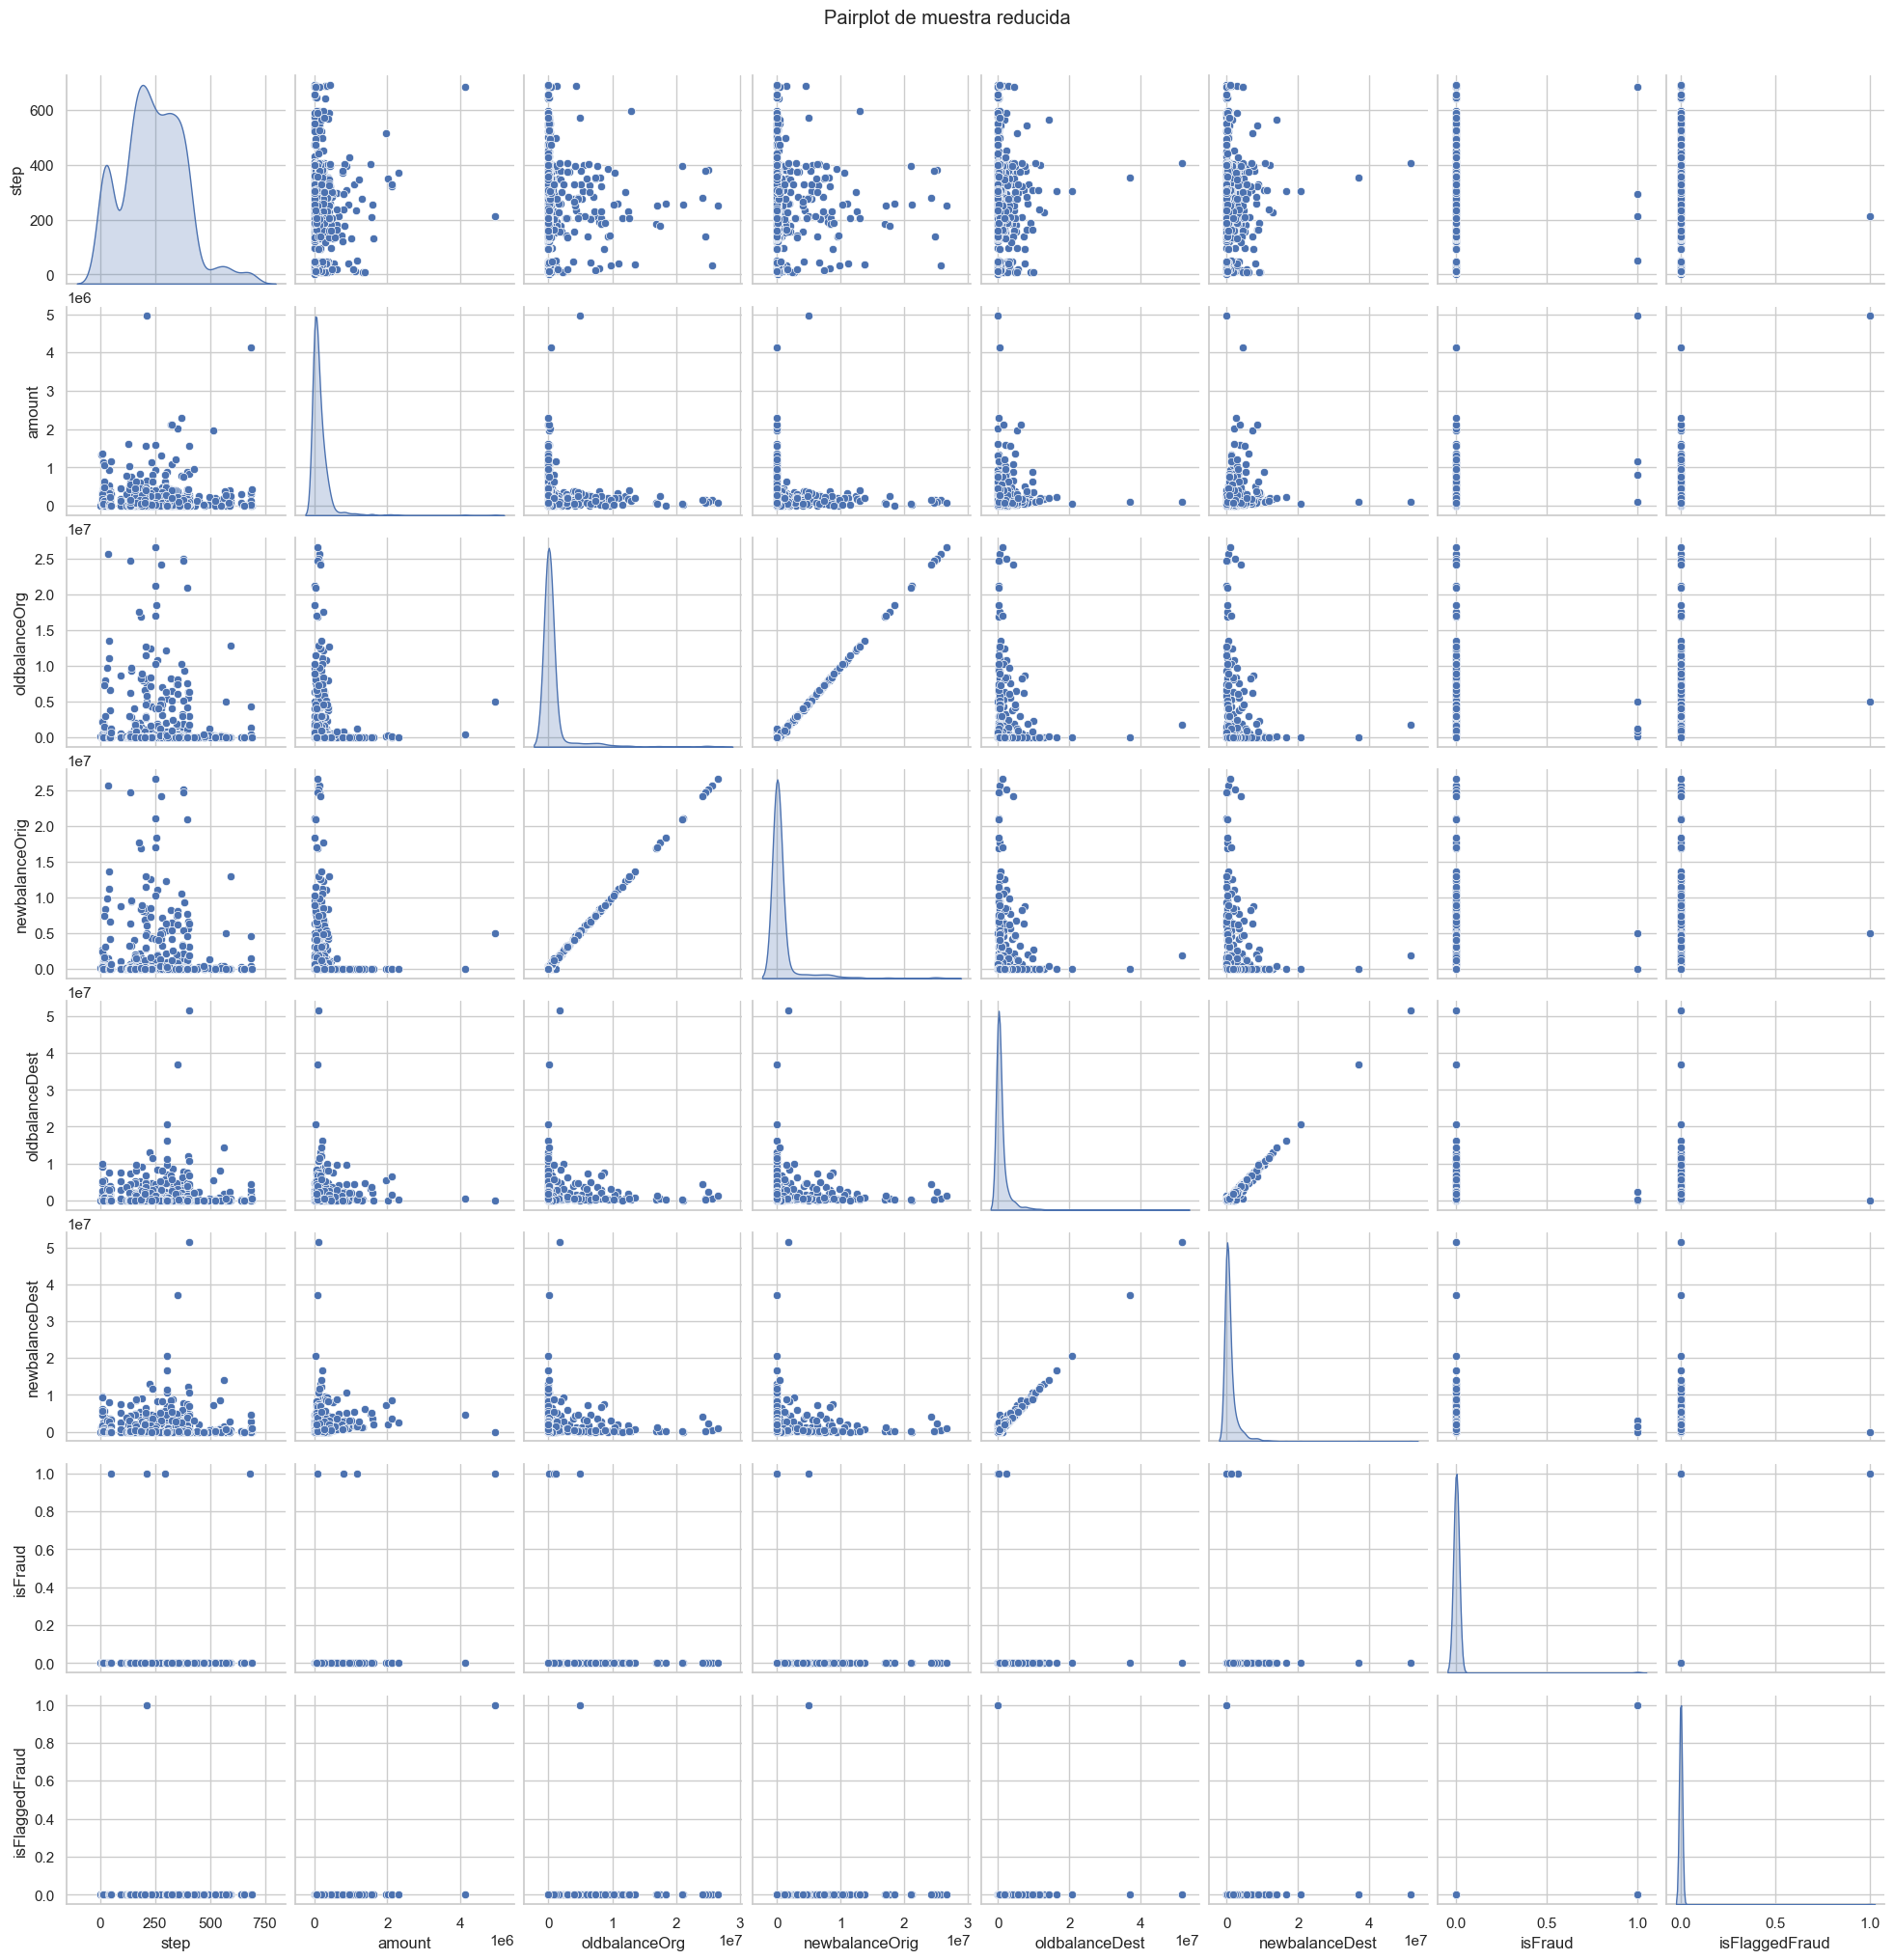

In [15]:
# Pairplot sobre muestra reducida
sample_pairplot = df.sample(1000, random_state=42)
sns.pairplot(sample_pairplot, diag_kind="kde")
plt.suptitle("Pairplot de muestra reducida", y=1.02)
plt.show()

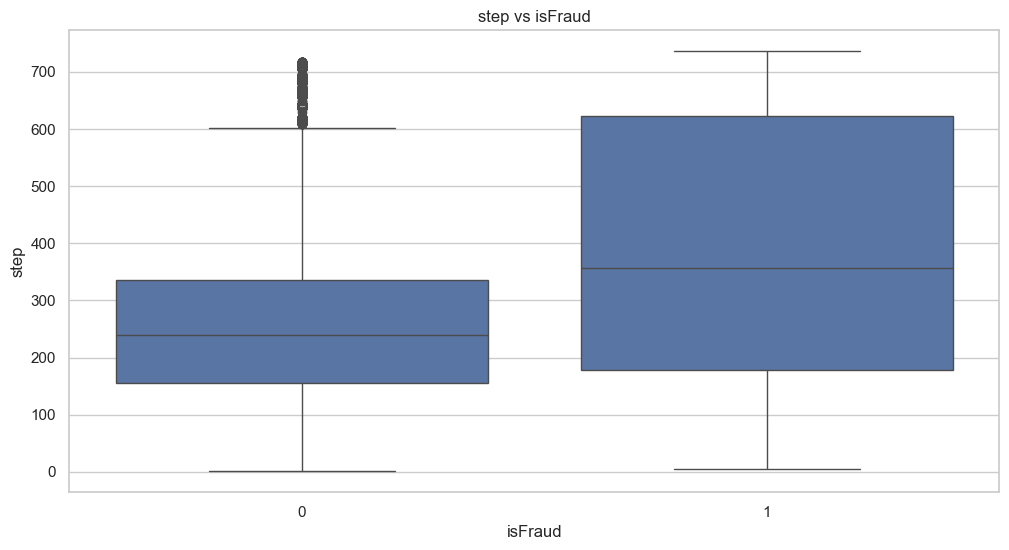

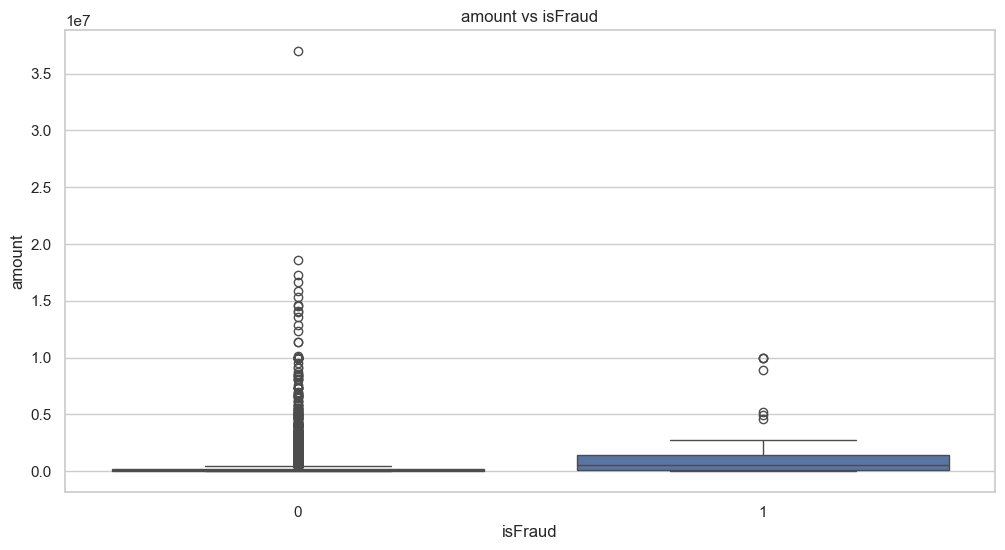

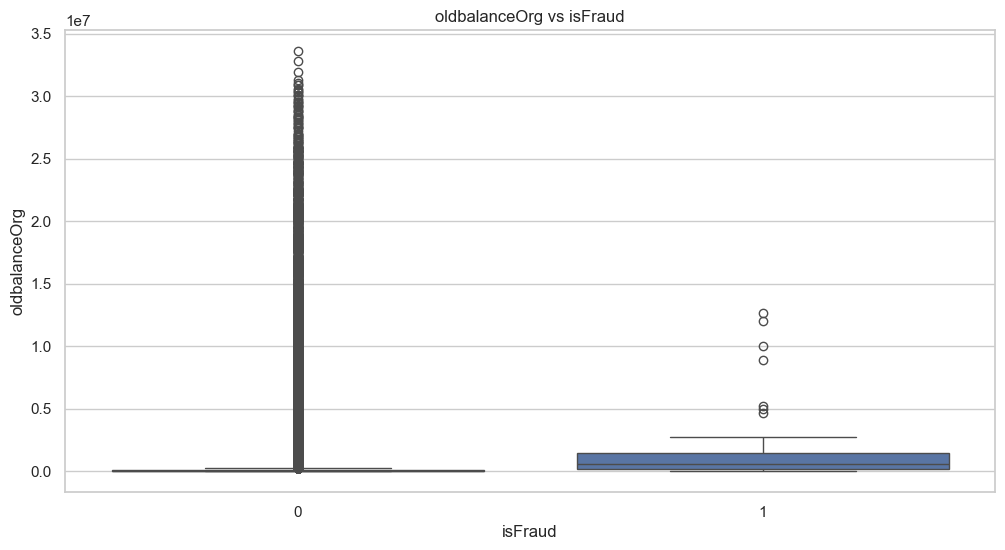

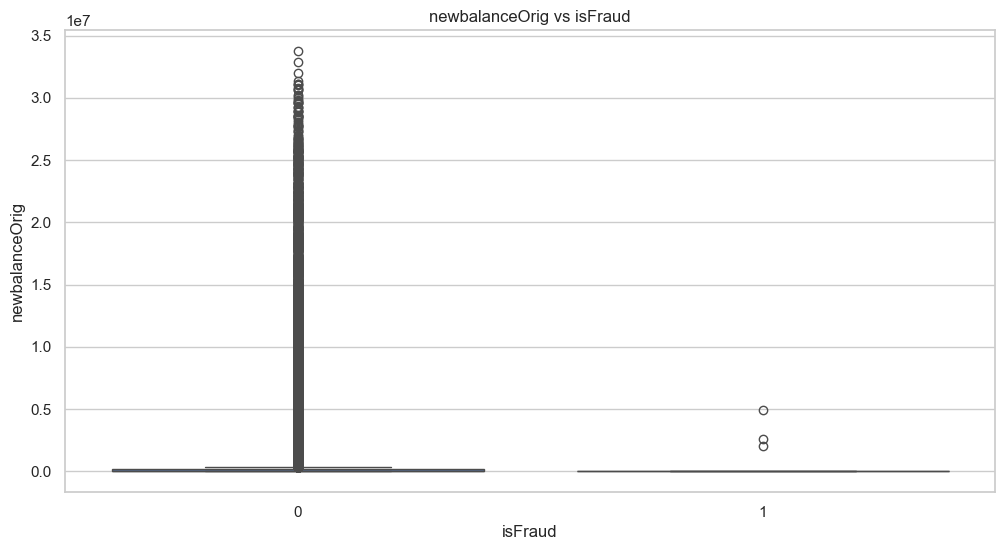

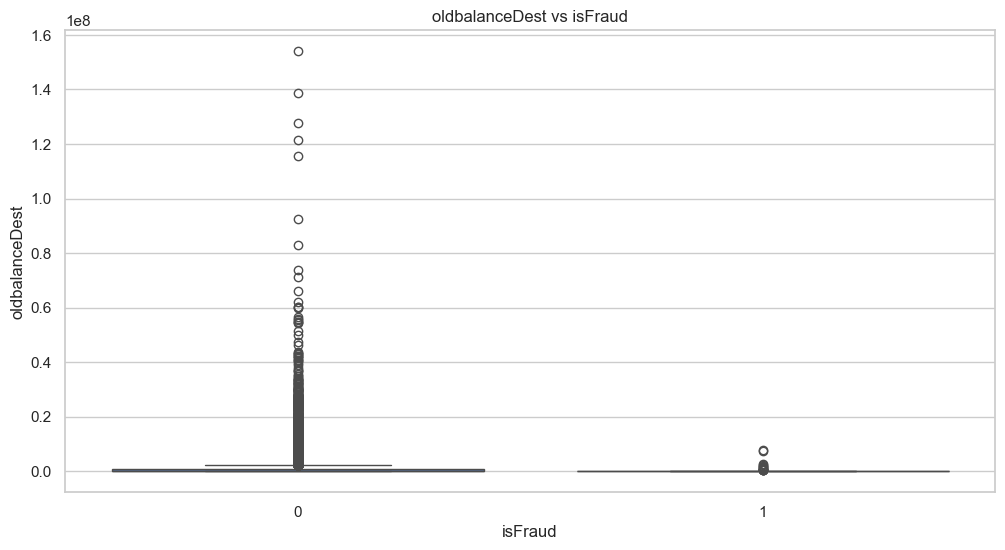

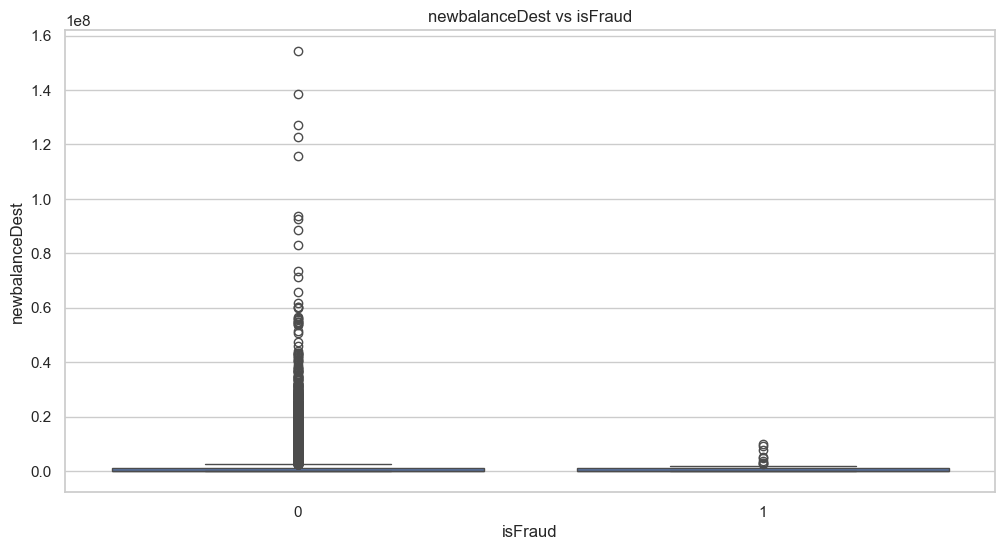

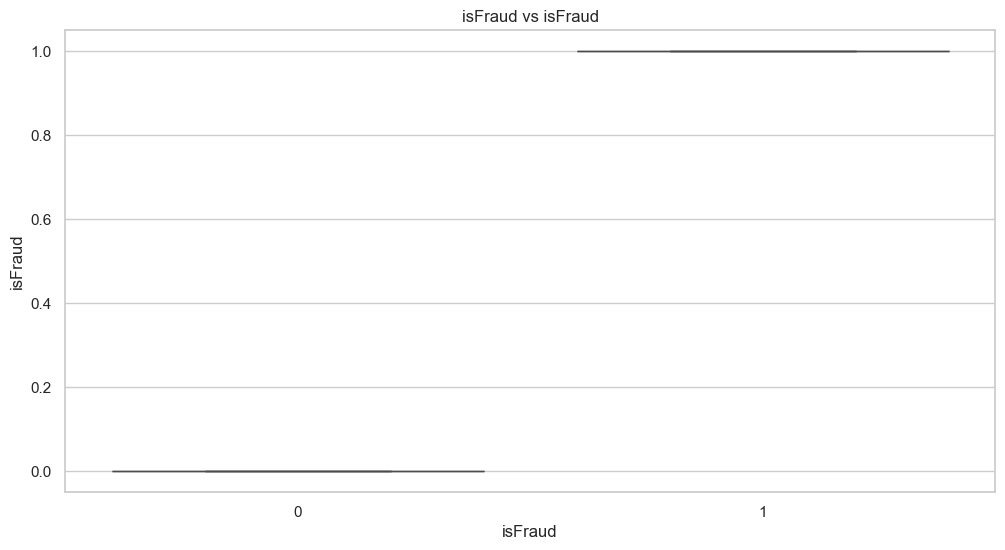

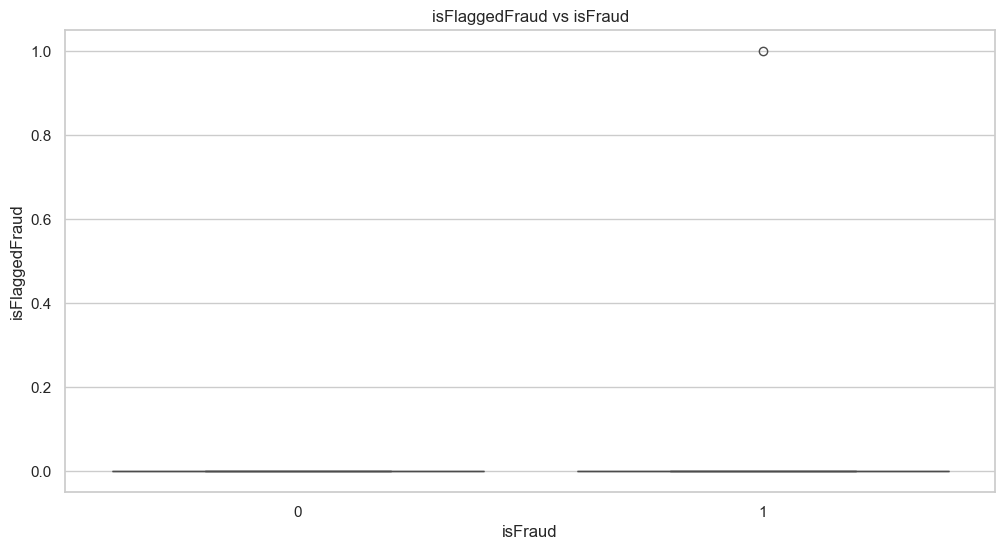

In [16]:
# Boxplots numéricos vs variable objetivo usando muestra
target = "isFraud" if "isFraud" in df.columns else None
num_cols = df.select_dtypes(include=np.number).columns
if target:
    sample_box = df.sample(50000, random_state=42)
    for col in num_cols:
        sns.boxplot(data=sample_box, x=target, y=col)
        plt.title(f"{col} vs {target}")
        plt.show()

7. ANÁLISIS DE RELACIONES CATEGÓRICAS


Proporción isFraud por type:
 isFraud          0         1
type                        
CASH_IN   1.000000  0.000000
CASH_OUT  0.998160  0.001840
DEBIT     1.000000  0.000000
PAYMENT   1.000000  0.000000
TRANSFER  0.992312  0.007688


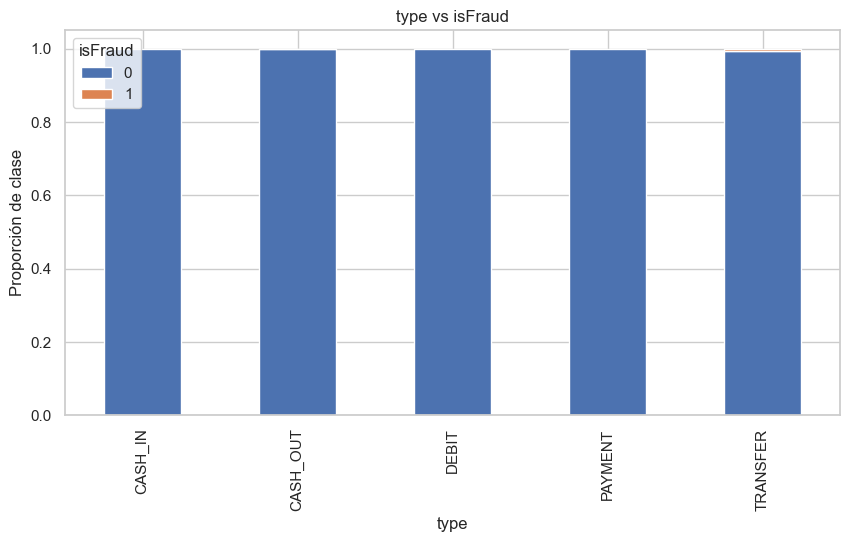

In [17]:
if target:
    cat_cols_target = [col for col in cat_cols if df[col].nunique() <= 20]  # pocas categorías
    for col in cat_cols_target:
        ct = pd.crosstab(df[col], df[target], normalize="index")
        print(f"\nProporción {target} por {col}:\n", ct)
        ct.plot(kind="bar", stacked=True, figsize=(10,5))
        plt.title(f"{col} vs {target}")
        plt.ylabel("Proporción de clase")
        plt.show()

8. OUTLIERS

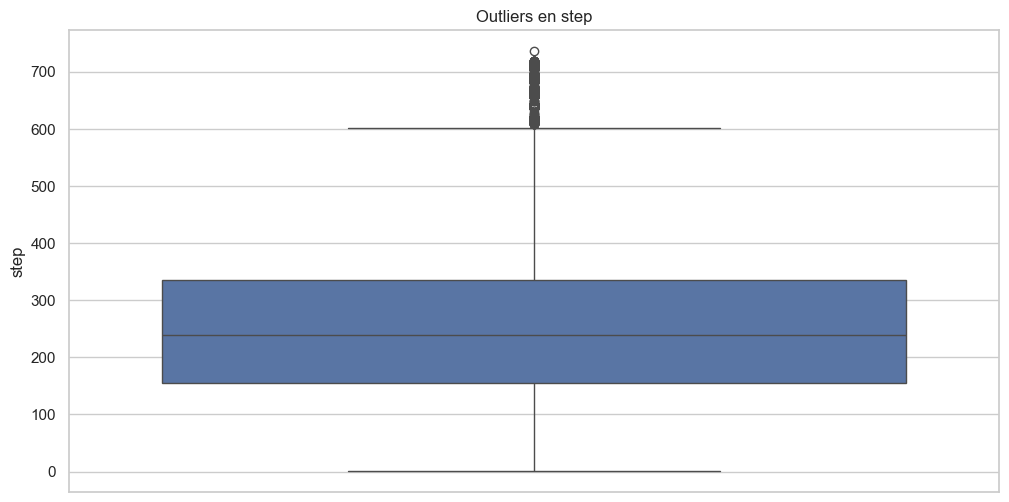

step -> Outliers detectados: 102688


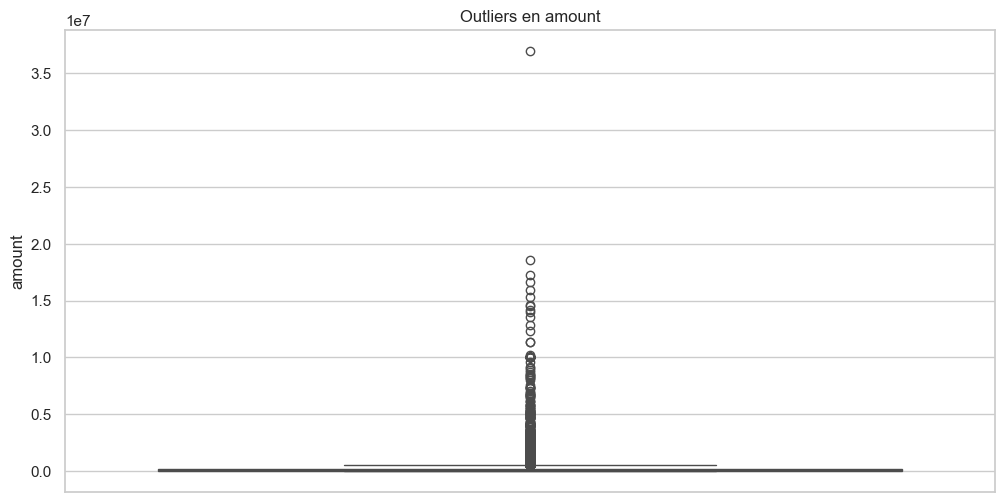

amount -> Outliers detectados: 338078


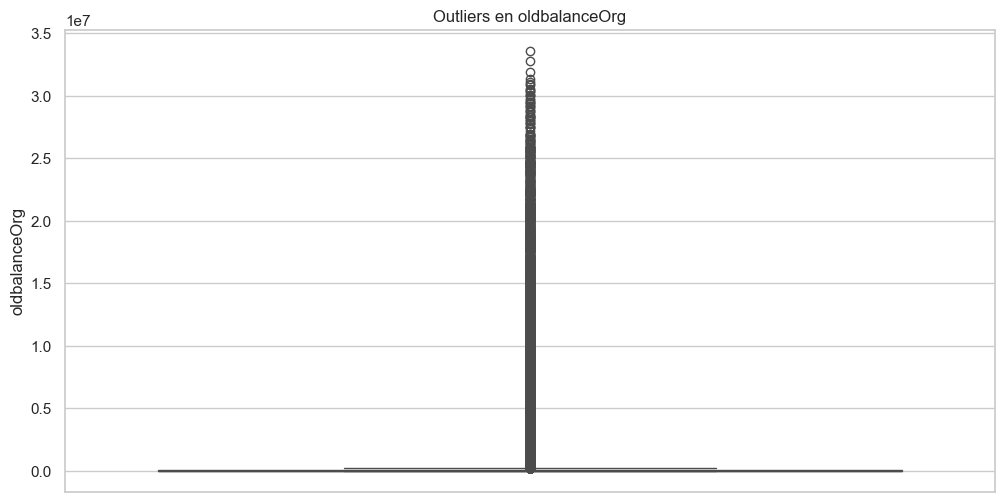

oldbalanceOrg -> Outliers detectados: 1112507


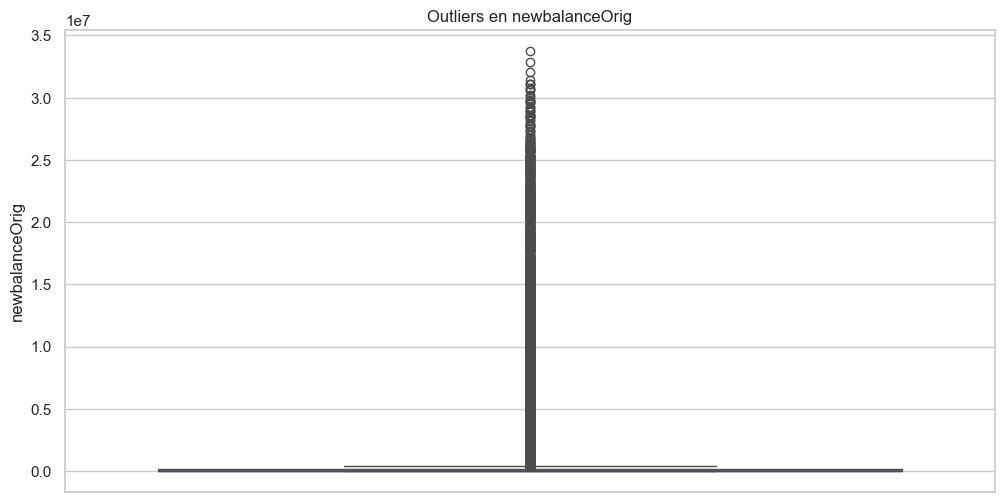

newbalanceOrig -> Outliers detectados: 1053391


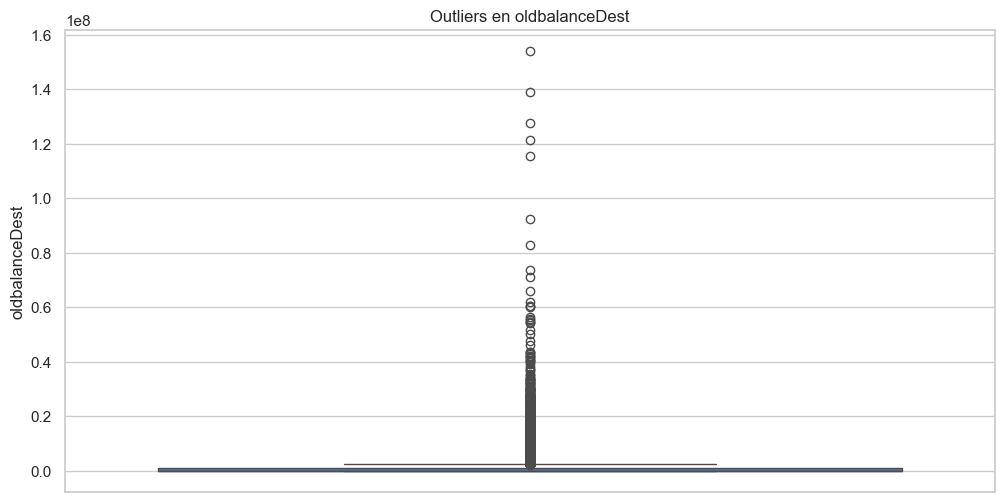

oldbalanceDest -> Outliers detectados: 786135


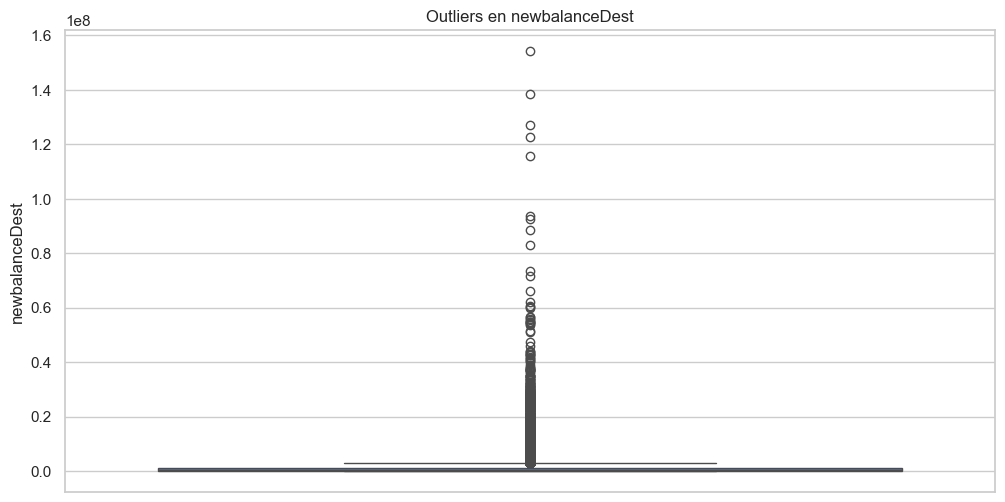

newbalanceDest -> Outliers detectados: 738527


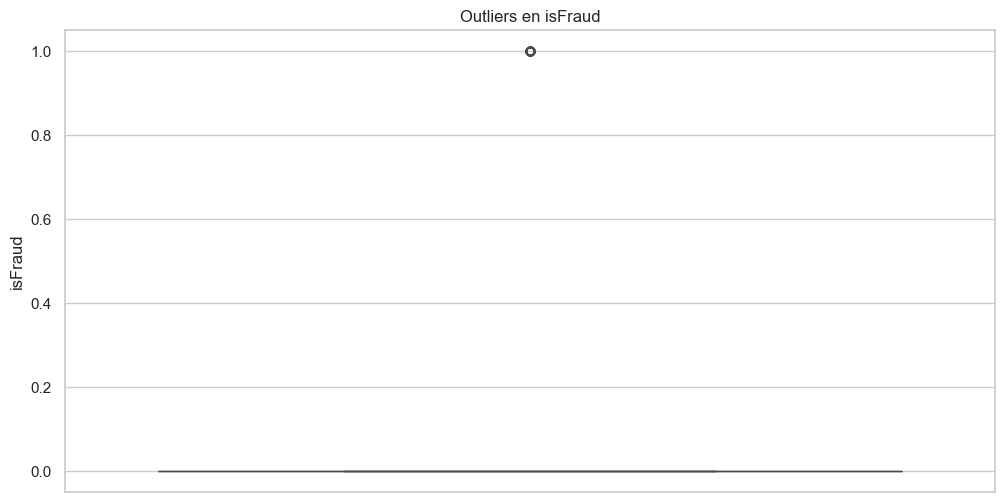

isFraud -> Outliers detectados: 8213


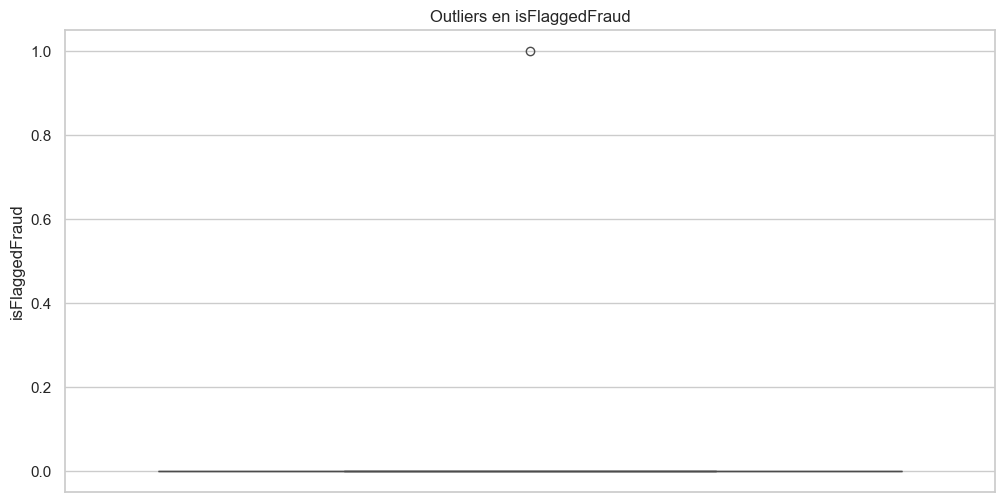

isFlaggedFraud -> Outliers detectados: 16


In [18]:
for col in num_cols:
    sample_out = df.sample(50000, random_state=42)
    sns.boxplot(y=sample_out[col])
    plt.title(f"Outliers en {col}")
    plt.show()
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = df[(df[col]<lower)|(df[col]>upper)]
    print(f"{col} -> Outliers detectados: {len(outliers)}")

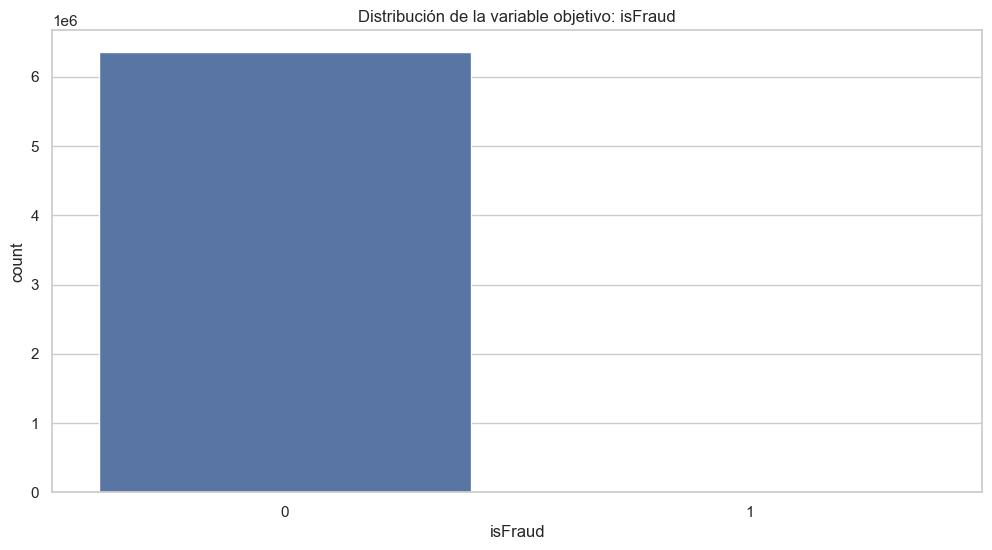


Proporciones de fraude:
isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64


In [19]:
# PROPORCIÓN DE FRAUDE
if "isFraud" in df.columns:
    sns.countplot(x="isFraud", data=df)
    plt.title("Distribución de la variable objetivo: isFraud")
    plt.show()
    print("\nProporciones de fraude:")
    print(df["isFraud"].value_counts(normalize=True))

9. NULOS

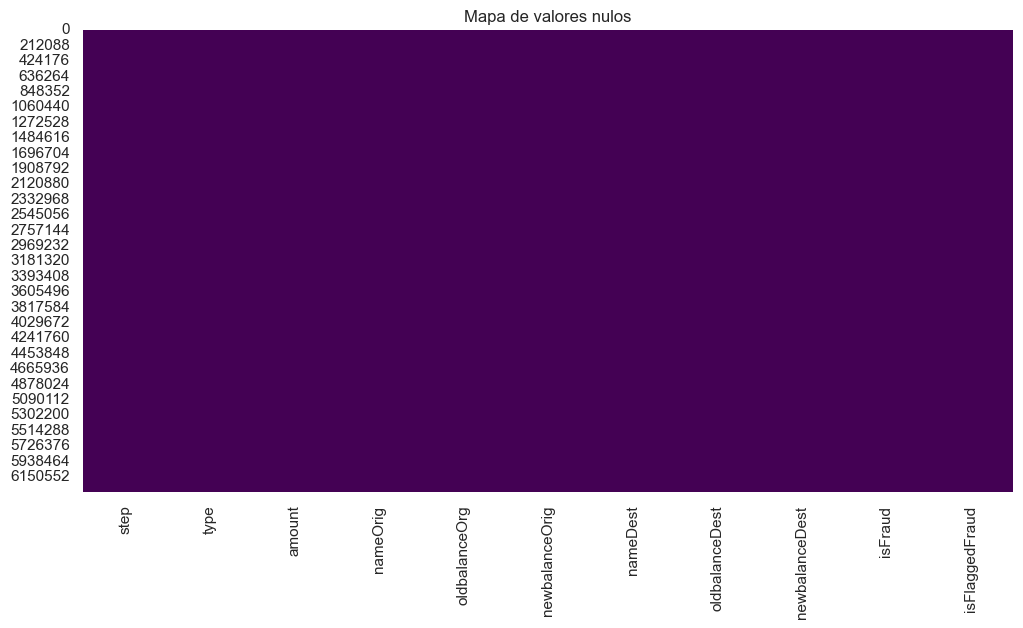

In [20]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de valores nulos")
plt.show()

10. BALANCEO DE CLASES

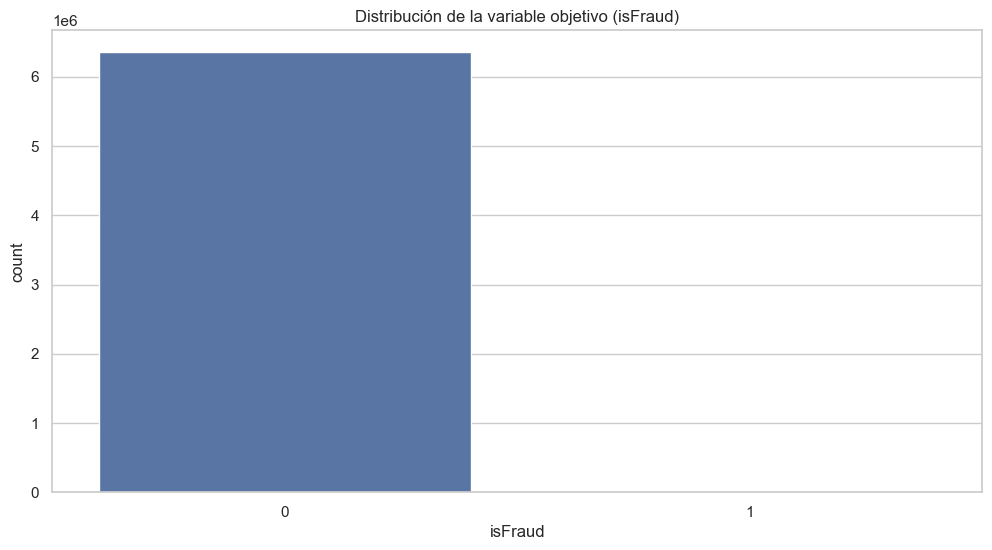


Proporciones de la clase objetivo:
isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64


In [21]:
if target:
    sns.countplot(x=target, data=df)
    plt.title(f"Distribución de la variable objetivo ({target})")
    plt.show()
    print("\nProporciones de la clase objetivo:")
    print(df[target].value_counts(normalize=True))

11. PREPROCESAMIENTO SUGERIDO

In [22]:
# Imputación de nulos
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\Valentina Molina\AppData\Local\Temp\ipykernel_17272\1971453383.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Valentina Molina\AppData\Local\Temp\ipykernel_17272\1971453383.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [23]:
# Codificación de categóricas
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

In [24]:
# Escalado
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


12. CORRELACIONES AVANZADAS

In [25]:
# Correlación categórica con variable objetivo (Cramer’s V)
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

if target:
    print("\n=== Correlación categórica con variable objetivo (Cramér's V) ===")
    cat_cols_cramer = [col for col in cat_cols if df[col].nunique() <= 20]
    for col in cat_cols_cramer:
        cv = cramers_v(df[col], df[target])
        print(f"{col}: {cv:.3f}")



=== Correlación categórica con variable objetivo (Cramér's V) ===
type: 0.059


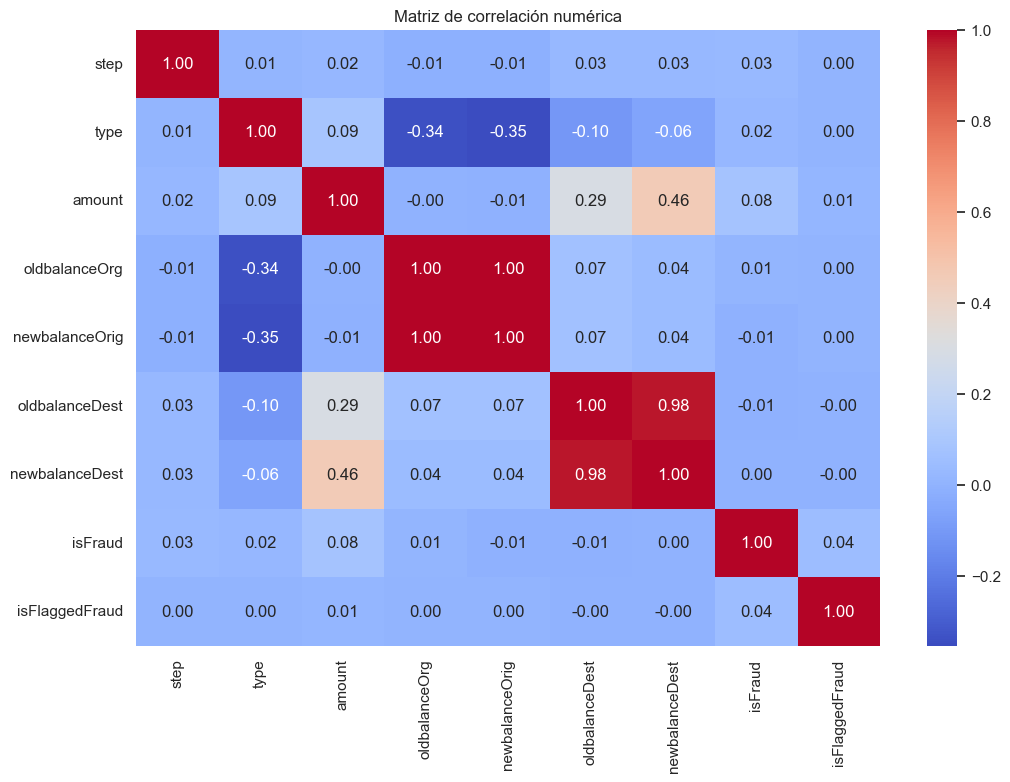

In [26]:
# MATRIZ DE CORRELACIÓN
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación numérica")
plt.show()

13. BASELINE DE RENDIMIENTO

In [27]:
if target:
    # Tomamos una muestra para velocidad
    sample_baseline = df.sample(100000, random_state=42)
    X = sample_baseline.drop(target, axis=1)
    y = sample_baseline[target]

    # Convertimos a 0 y 1: 0 = no fraude, 1 = fraude
    y_bin = (y != 0).astype(int)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y_bin, test_size=0.2, random_state=42, stratify=y_bin
    )

    # Dummy classifier
    baseline = DummyClassifier(strategy="most_frequent")
    baseline.fit(X_train, y_train)
    y_pred = baseline.predict(X_test)

    print("\n=== BASELINE ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("\nReporte completo:")
    print(classification_report(y_test, y_pred))


=== BASELINE ===
Accuracy: 1.0
F1 Score: 1.0

Reporte completo:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     20000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

